# Waiter Tips Prediction


## Data Preprocessing


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

### Load the data

In [2]:
Students_Data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/student-mat.csv")

### EDA

#### Describe the data

In [5]:
Students_Data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
Students_Data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [7]:
Students_Data.shape

(395, 33)

In [8]:
Students_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [9]:
Students_Data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
Students_Data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
390    False
391    False
392    False
393    False
394    False
Length: 395, dtype: bool

#### Visualize the data

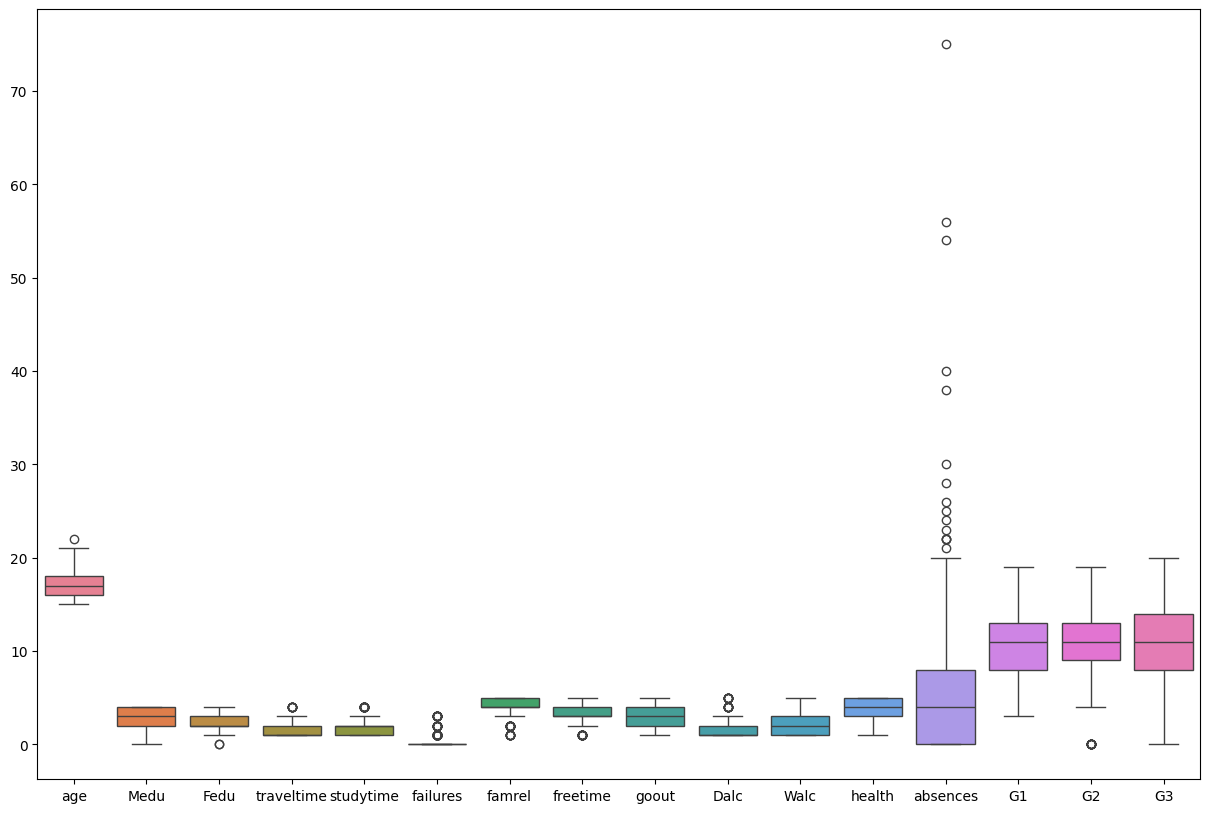

In [12]:
plt.figure(figsize = (15,10))
sns.boxplot(data = Students_Data)
plt.show()

### Cleaning the data

#### Removing Outliers

In [14]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_absences = Students_Data['absences'].quantile(0.25)
Q3_absences = Students_Data['absences'].quantile(0.75)
IQR_absences = Q3_absences - Q1_absences

lower_bound_absences = Q1_absences - 1.5 * IQR_absences
upper_bound_absences = Q3_absences + 1.5 * IQR_absences

# Remove outliers
Students_Data_no_outliers = Students_Data[(Students_Data['absences'] >= lower_bound_absences) & (Students_Data['absences'] <= upper_bound_absences)]
                  

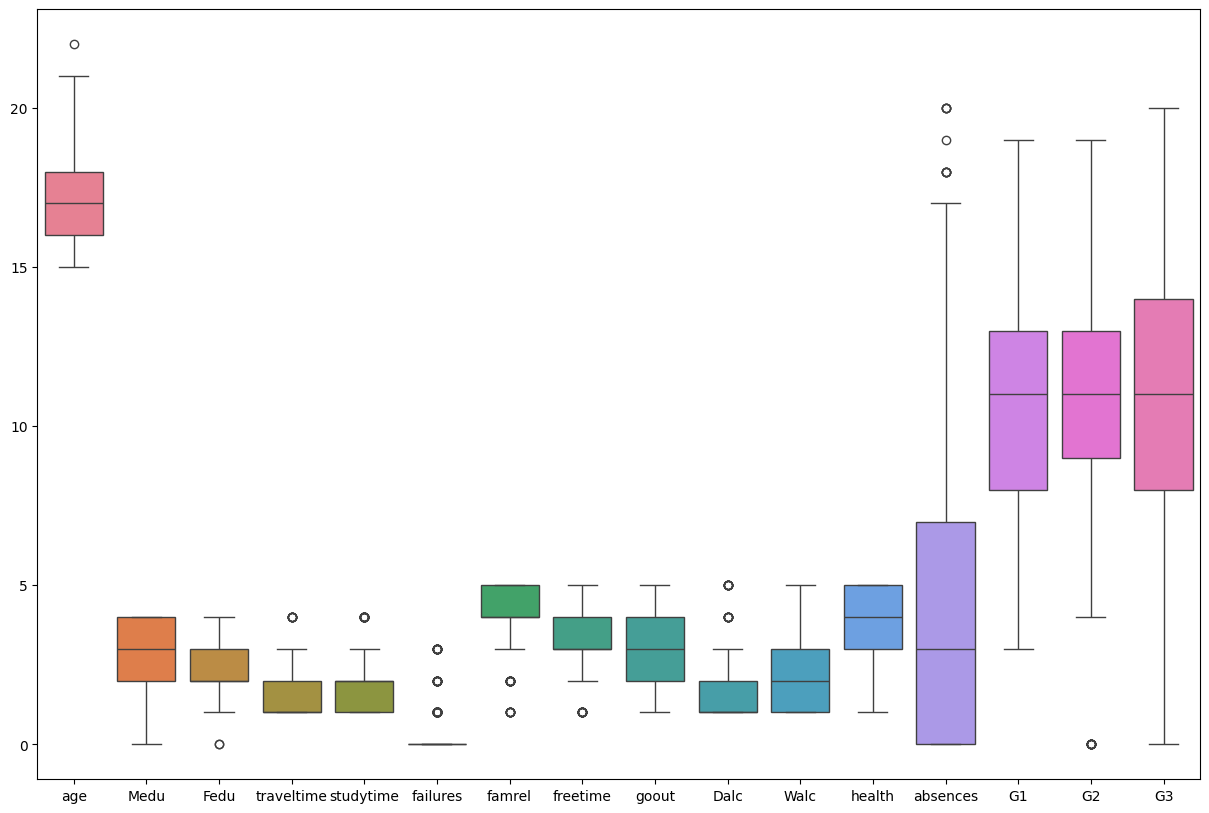

In [15]:
plt.figure(figsize = (15,10))
sns.boxplot(data = Students_Data_no_outliers)
plt.show()

### Encoding

In [37]:
Students_Data_Encoded = pd.get_dummies(Students_Data_no_outliers, columns=['school', 'sex','famsize','address','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'])

<Axes: >

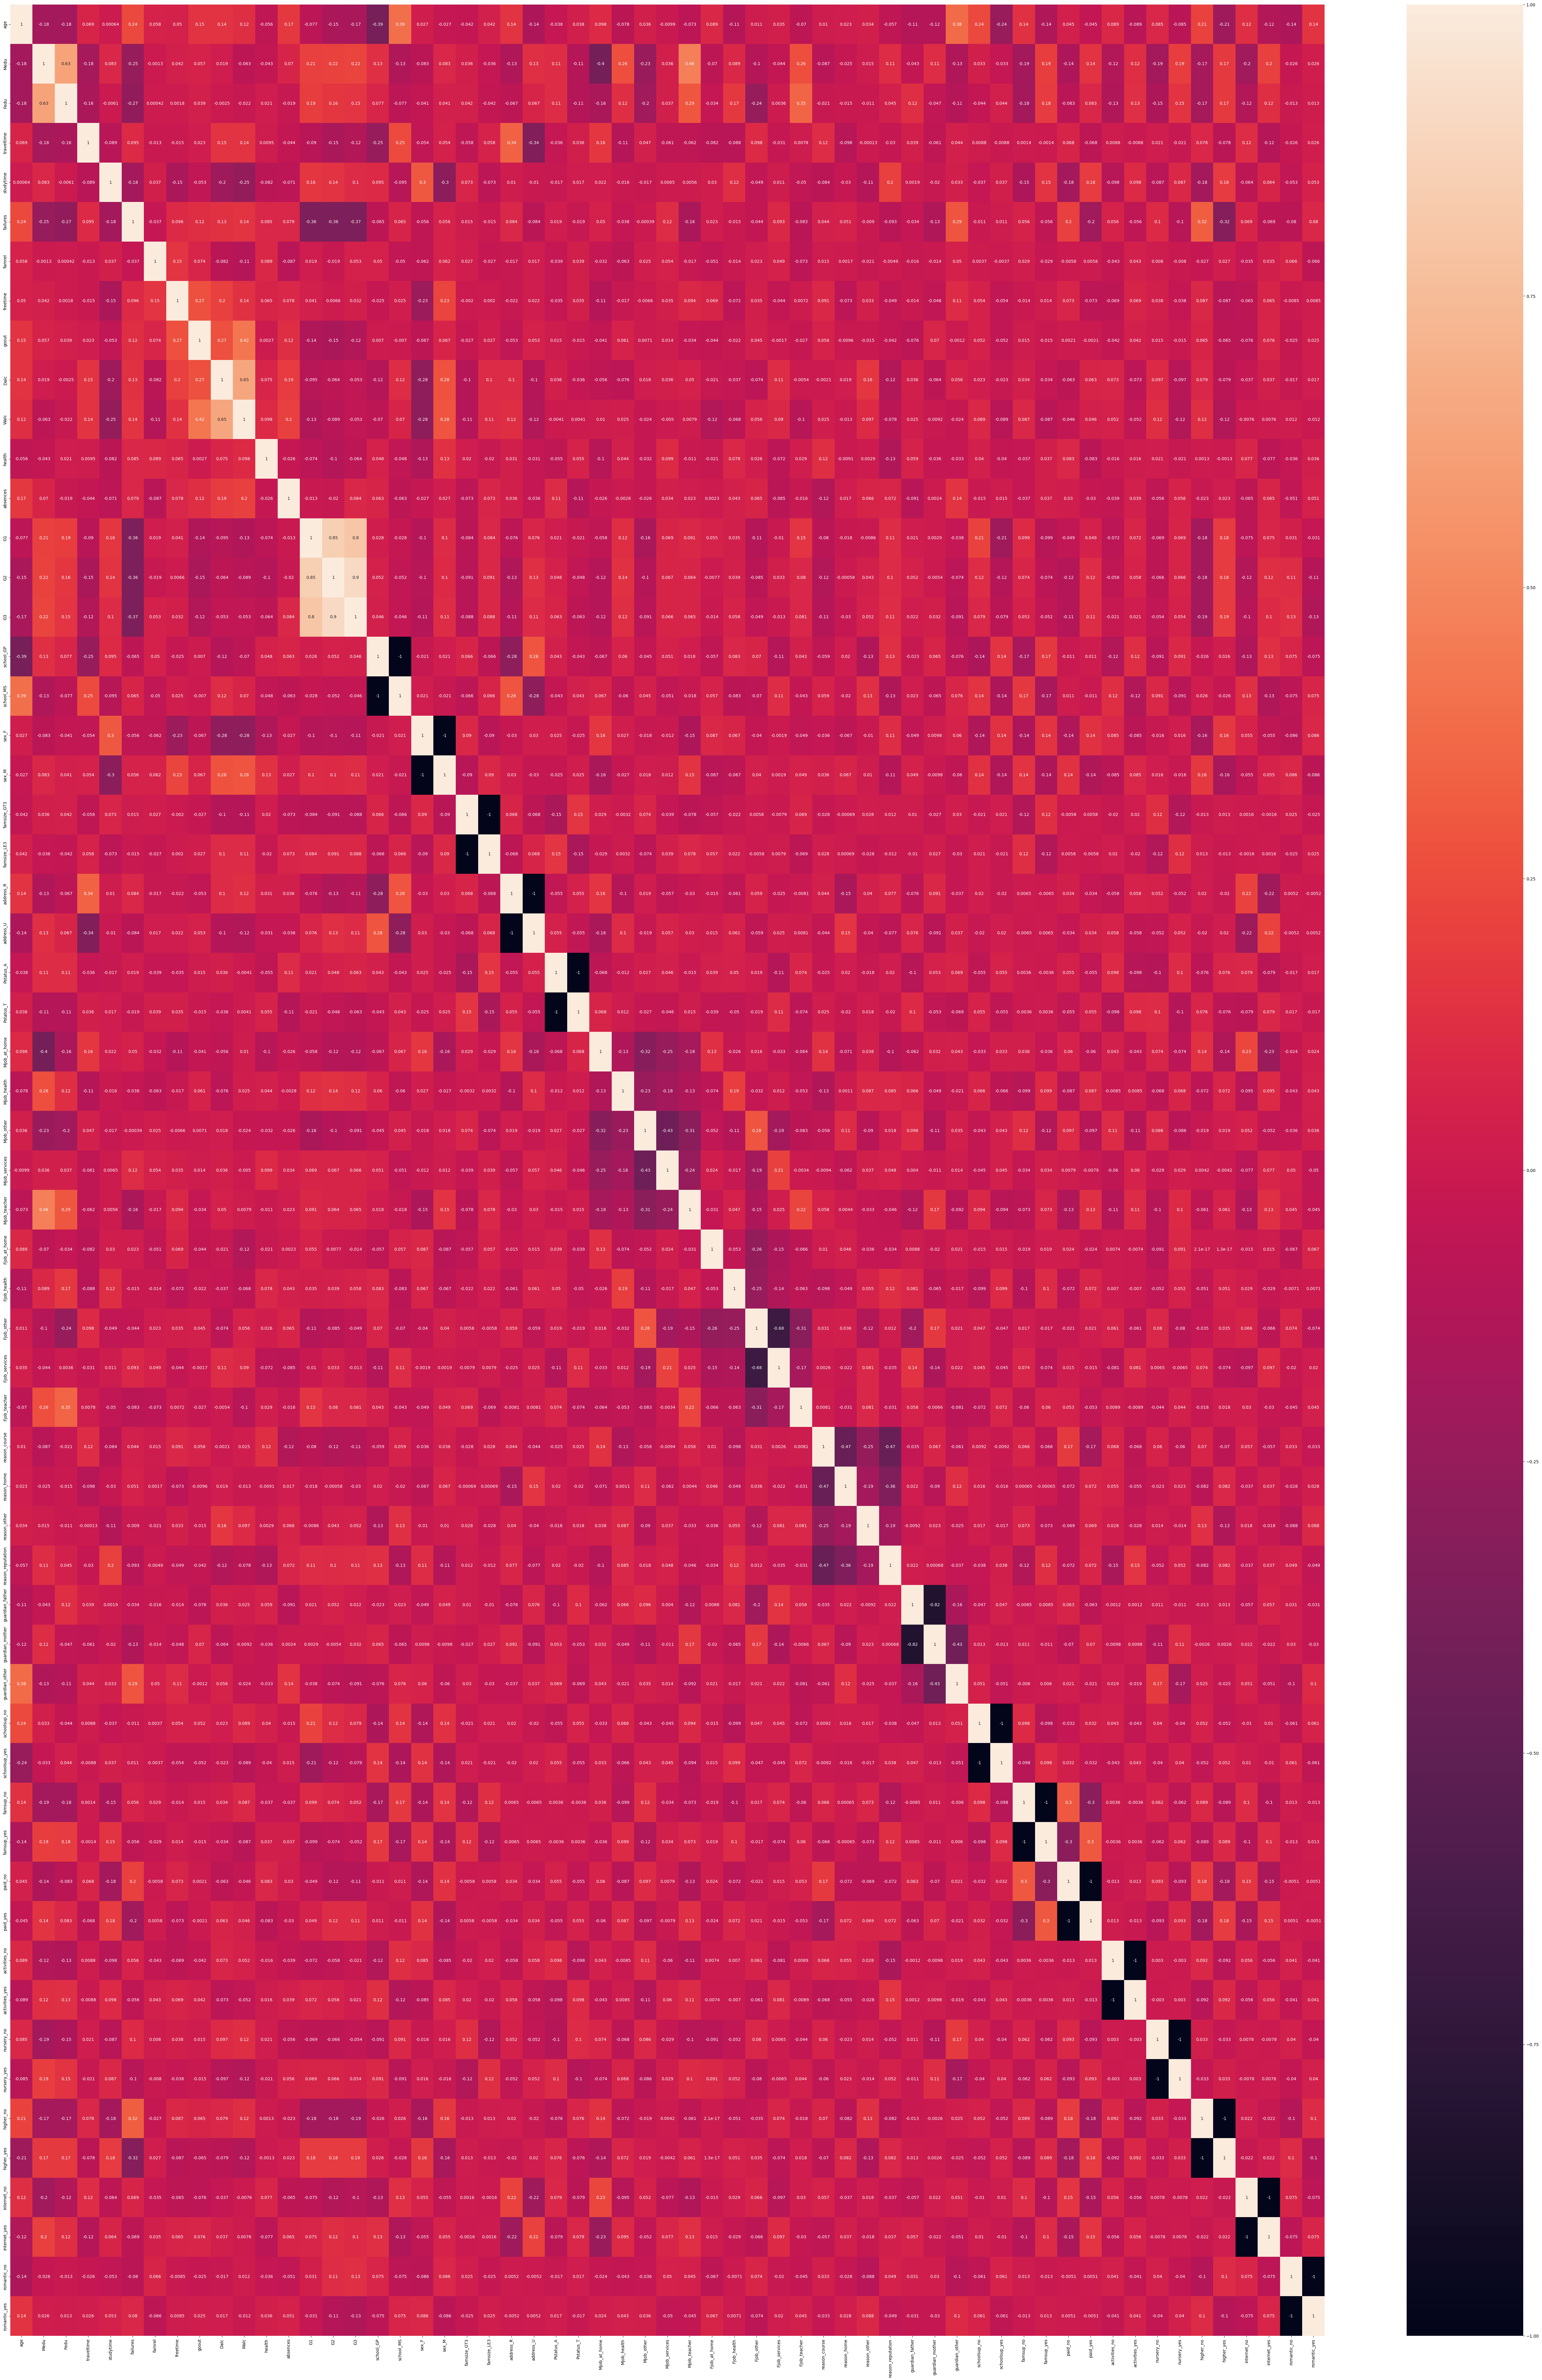

In [41]:
corr_matrix = Students_Data_Encoded.corr()
plt.figure(figsize = (70,100))
sns.heatmap(data = corr_matrix, annot = True)

#### Scaling

In [42]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Students_Data_Encoded .drop(columns = ['G3']))

### Train Test Split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Students_Data_Encoded ['G3'], test_size=0.2, random_state=42)

## Training 

In [44]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [46]:
print("Training Mean Squared Error:", mean_squared_error(y_train, y_train_pred))
print("Testing Mean Squared Error:", mean_squared_error(y_test, y_test_pred))

Training Mean Squared Error: 3.085127055130878
Testing Mean Squared Error: 4.13791533609416


In [47]:
model.coef_

array([-2.25219568e-01,  1.23549151e-01, -6.09624649e-02,  1.89702127e-01,
       -1.21445845e-01, -2.34189982e-01,  2.19424615e-01,  3.36301064e-02,
        6.16602694e-02, -2.72008172e-01,  2.49781723e-01,  1.74068381e-01,
        5.55589173e-01,  5.96819354e-01,  3.61385211e+00, -5.23365189e+11,
       -5.23365189e+11,  1.57708372e+11,  1.57708372e+11, -2.22330493e+11,
       -2.22330493e+11,  3.42574146e+12,  3.42574146e+12,  1.72849797e+12,
        1.72849797e+12,  1.78997530e+12,  1.42063534e+12,  2.38207281e+12,
        2.17012221e+12,  1.76429671e+12, -1.29582169e+12, -1.23273445e+12,
       -2.88702267e+12, -2.59501572e+12, -1.51610522e+12,  1.81673680e+12,
        1.64904984e+12,  1.09669342e+12,  1.64904984e+12, -5.74622782e+12,
       -6.27816885e+12, -3.60241630e+12, -3.97792610e+12, -3.97792610e+12,
        6.27796851e+11,  6.27796851e+11,  7.46615188e+11,  7.46615188e+11,
        4.82304238e+11,  4.82304238e+11, -1.45853629e+11, -1.45853629e+11,
       -1.33620411e+12, -

In [48]:
model.intercept_

np.float64(10.414786087839227)

In [49]:
model.score(X_train, y_train)

0.8431886070391578

In [50]:
model.score(X_test, y_test)

0.8475377064805704